In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


sns.set_palette(palette = 'dark')
sns.set_style("darkgrid")

In [2]:
data = pd.read_csv("/kaggle/input/jobs-in-data/jobs_in_data.csv")
data.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [3]:
data.isnull().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [4]:
data.duplicated().sum()

4014

The data has 4014 duplicates. 

In [5]:
# dropping the duplicates
data.drop_duplicates(inplace= True)

In [6]:
data.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

In [7]:
data.nunique()

work_year                4
job_title              125
job_category            10
salary_currency         11
salary                1507
salary_in_usd         1786
employee_residence      83
experience_level         4
employment_type          4
work_setting             3
company_location        70
company_size             3
dtype: int64

In [8]:
data.dtypes

work_year              int64
job_title             object
job_category          object
salary_currency       object
salary                 int64
salary_in_usd          int64
employee_residence    object
experience_level      object
employment_type       object
work_setting          object
company_location      object
company_size          object
dtype: object

# Understanding the Salary_in_usd column

The notebook will focus mainly on this column since the unit is standard. 

This column will be compared to other features in the dataset.

In [9]:
data.salary_in_usd.min(), data.salary_in_usd.max()

(15000, 450000)

<Axes: xlabel='salary_in_usd', ylabel='Count'>

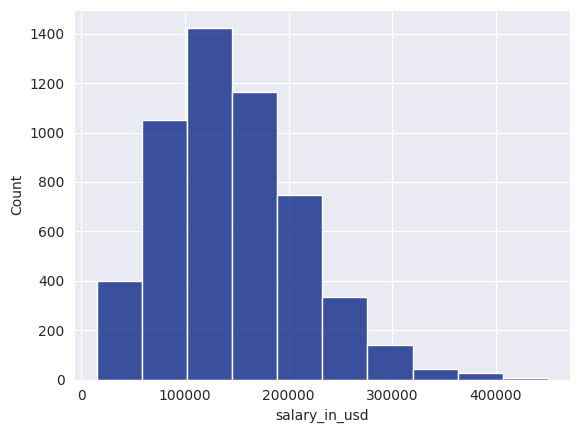

In [10]:
sns.histplot(data = data, x = 'salary_in_usd', bins = 10)

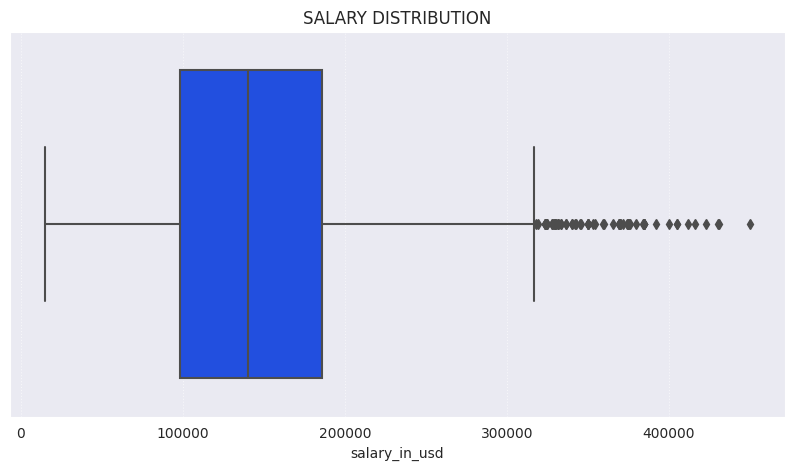

In [11]:
plt.figure(figsize = (10,5))
sns.boxplot(data = data, x = 'salary_in_usd', palette = 'bright')
plt.title("SALARY DISTRIBUTION")
plt.grid(axis = 'x', linestyle = ":", alpha = 0.6)

In [12]:
data.salary_in_usd.mean()

146258.40909941957

In [13]:
data['salary_in_usd'].skew()

0.6566054032423069

Most of the individuals in the survey earned between 10,000 and 200,000  USD, with a mean value of 145,814.94 USD.

The salary also has a moderate skew, slightly a larger composition of smaller values (based on the range of the data).


# JOB ANALYSIS


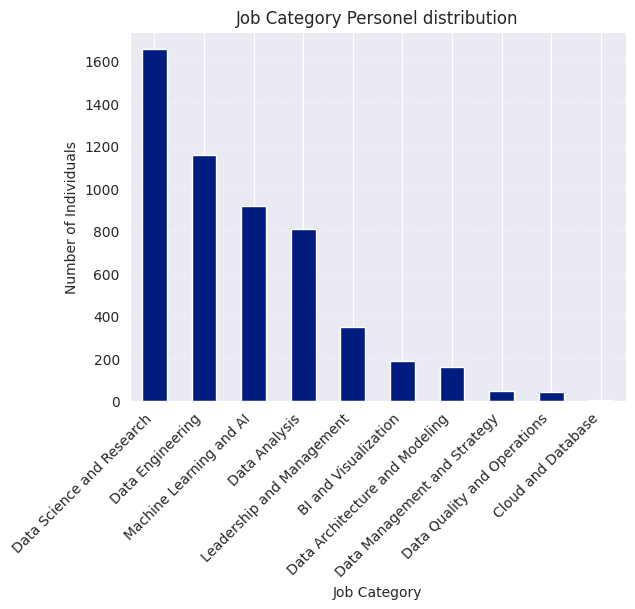

In [14]:
data.job_category.value_counts().plot(kind = 'bar')
plt.title('Job Category Personel distribution')
plt.xlabel('Job Category')
plt.ylabel('Number of Individuals')
plt.xticks(rotation = 45, horizontalalignment ='right' )
plt.grid(axis = 'y', linestyle = ':', alpha = 0.6)

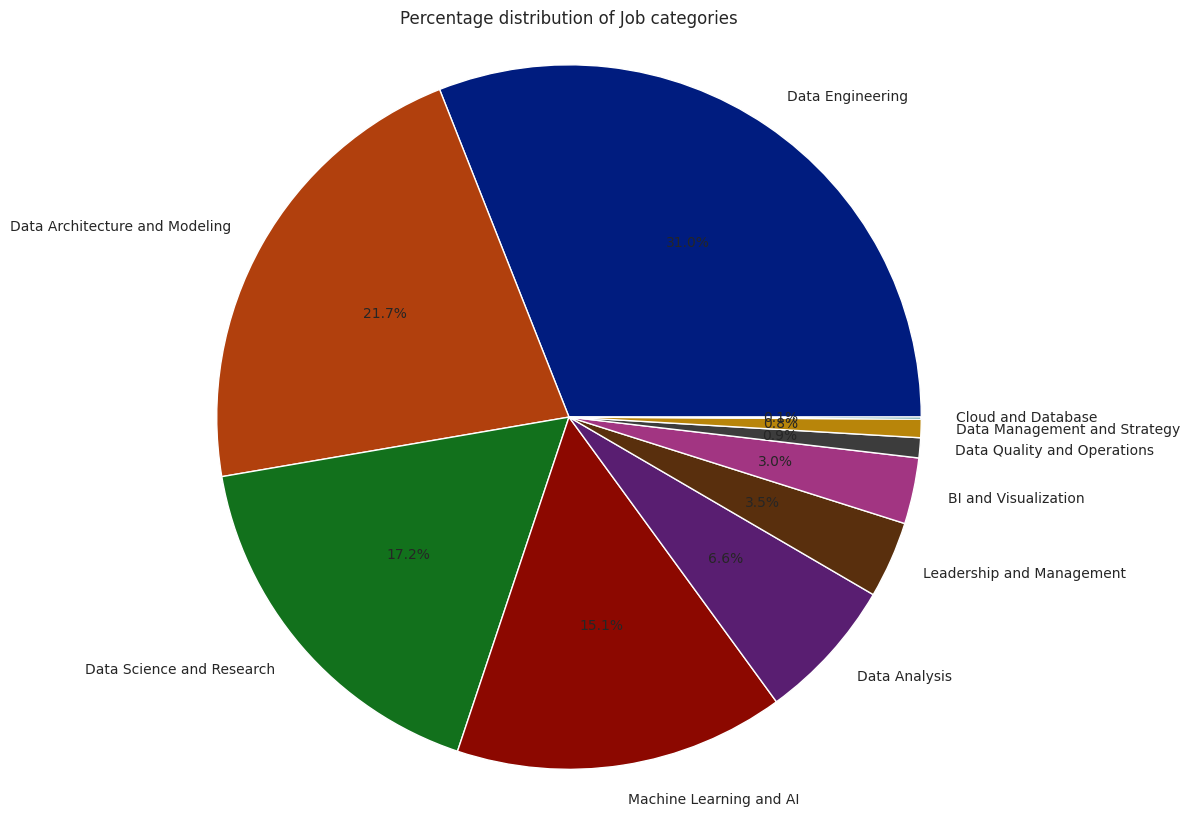

In [15]:
plt.figure(figsize = (10, 10))
x = data.job_category.value_counts()
y = data.job_category.unique()
#explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
plt.pie(x, autopct= '%1.1f%%', labels = y)
plt.title("Percentage distribution of Job categories")
plt.axis('equal')
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Machine Learning and AI'),
  Text(1, 0, 'Data Science and Research'),
  Text(2, 0, 'Data Architecture and Modeling'),
  Text(3, 0, 'Cloud and Database'),
  Text(4, 0, 'Leadership and Management'),
  Text(5, 0, 'Data Engineering'),
  Text(6, 0, 'BI and Visualization'),
  Text(7, 0, 'Data Management and Strategy'),
  Text(8, 0, 'Data Analysis'),
  Text(9, 0, 'Data Quality and Operations')])

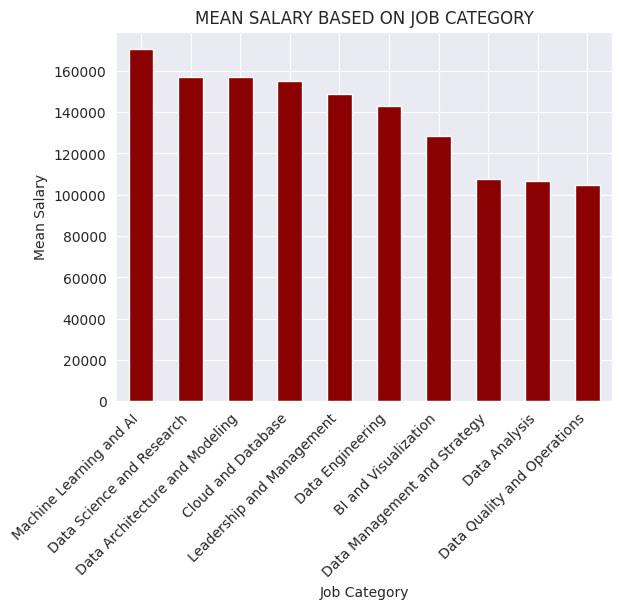

In [16]:
# finding mean based on job_category

data.groupby('job_category')['salary_in_usd'].mean().sort_values(ascending=False).plot(kind = 'bar', color = 'darkred')
plt.title('MEAN SALARY BASED ON JOB CATEGORY')
plt.xlabel('Job Category')
plt.ylabel('Mean Salary')
plt.xticks(rotation = 45, horizontalalignment ='right' )

# COMPARING SALARY AND work_year COLUMN

<Axes: xlabel='work_year'>

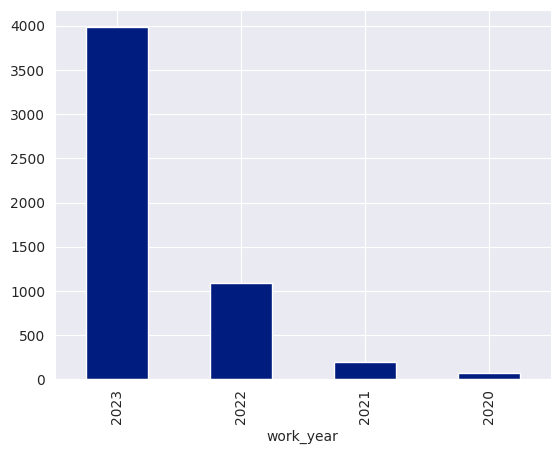

In [17]:
data['work_year'].value_counts().plot(kind = 'bar')

Most of the data was corrected in 2023, with the least corrected in 2020.

Text(0.5, 1.0, 'COMPARISON OF JOB CATEGORY BASED ON YEAR')

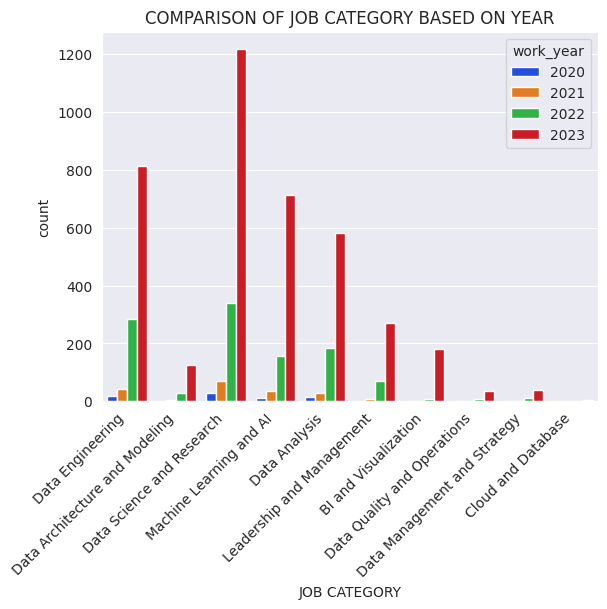

In [18]:
# COMPARING WORK YEAR AND JOB CATEGORY

sns.countplot(data = data, x = 'job_category', hue= 'work_year', palette='bright')
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.xlabel('JOB CATEGORY')
plt.title('COMPARISON OF JOB CATEGORY BASED ON YEAR')

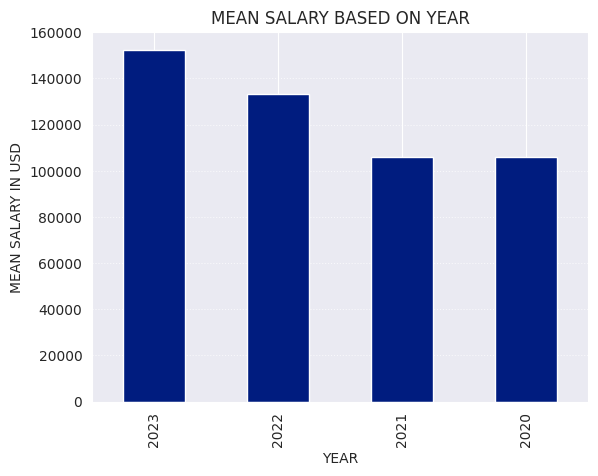

In [19]:
data.groupby('work_year')['salary_in_usd'].mean().sort_values(ascending=False).plot(kind = 'bar')
plt.title('MEAN SALARY BASED ON YEAR')
plt.xlabel('YEAR')
plt.ylabel('MEAN SALARY IN USD')
plt.grid(axis = 'y', linestyle = ':', alpha = 0.7)

2023 had the highest mean, with the lowest in 2020. However, it should be noted that this might be impacted by the distribution of data collection based on the years. 

# COMPARING SALARY AND employee_residence.

In [20]:
data['employee_residence'].nunique()

83

There are 83 different residences. I will focus on the 10 above highest paid and 10 lowest paid residences.


In [21]:
residence_data = pd.DataFrame({"RESIDENCE": data['employee_residence'], "salary": data['salary_in_usd']})
residence_data.head()

,RESIDENCE,salary
0,Germany,95012
1,United States,186000
2,United States,81800
3,United States,212000
4,United States,93300


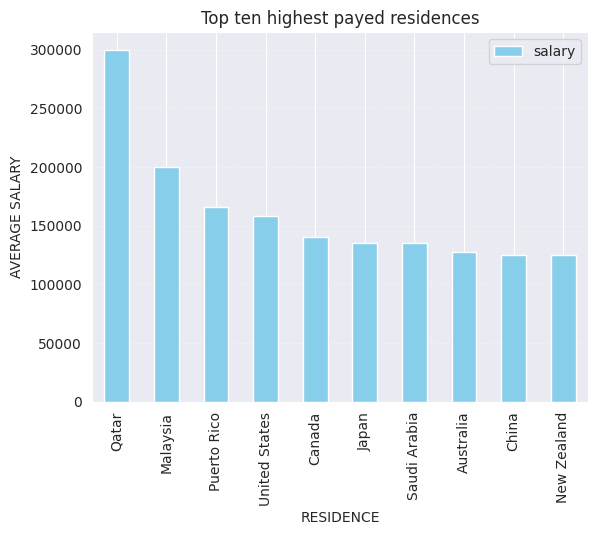

In [22]:

residence_data.groupby('RESIDENCE')['salary'].mean().sort_values(ascending = False).reset_index('RESIDENCE').head(10).plot(kind = 'bar', x = 'RESIDENCE',color = 'skyblue')
plt.title("Top ten highest payed residences")
plt.xlabel("RESIDENCE")
plt.ylabel("AVERAGE SALARY")
plt.grid(axis = 'y', linestyle = ':', alpha = 0.6)


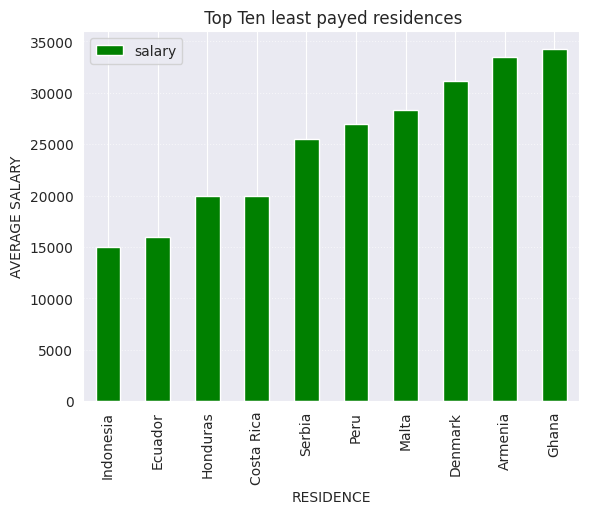

In [23]:
residence_data.groupby('RESIDENCE')['salary'].mean().sort_values(ascending = True).reset_index('RESIDENCE').head(10).plot(kind = 'bar', x = 'RESIDENCE', color = 'green')
plt.title(" Top Ten least payed residences")
plt.xlabel("RESIDENCE")
plt.ylabel("AVERAGE SALARY")
plt.grid(axis = 'y', linestyle = ':', alpha = 0.6)


# SALARY, EXPERIENCE LEVEL AND WORK YEAR

<Axes: xlabel='experience_level'>

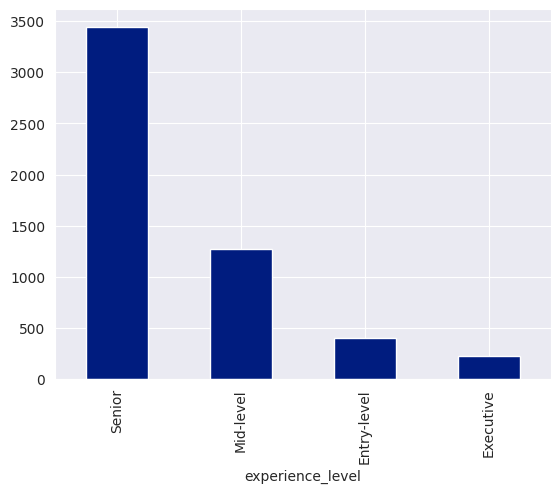

In [24]:
data['experience_level'].value_counts().plot(kind = 'bar')

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

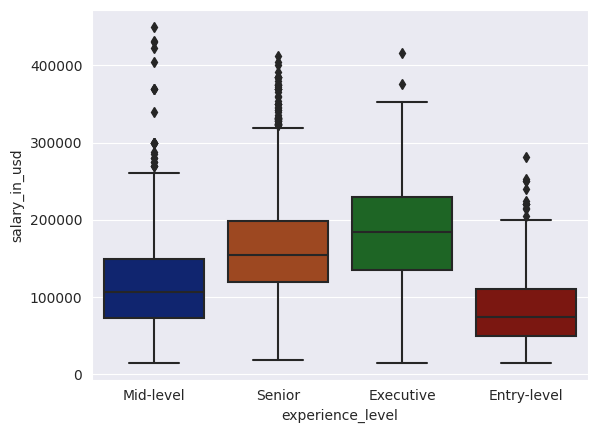

In [25]:
sns.boxplot(data = data, x = 'experience_level', y = 'salary_in_usd')

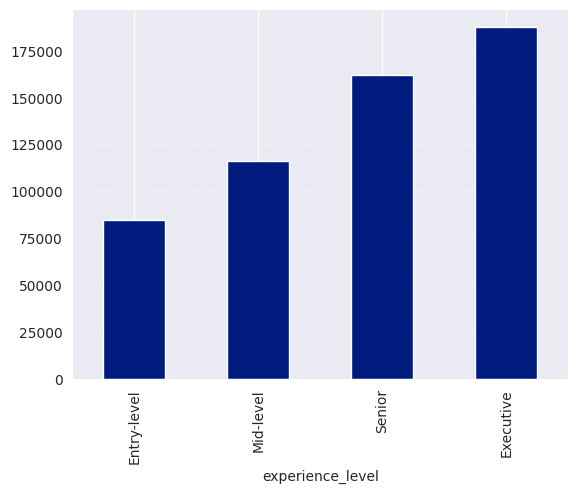

In [26]:
data.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=True).plot(kind = 'bar')
plt.grid(axis = 'y', alpha = 0.6, linestyle = ":")

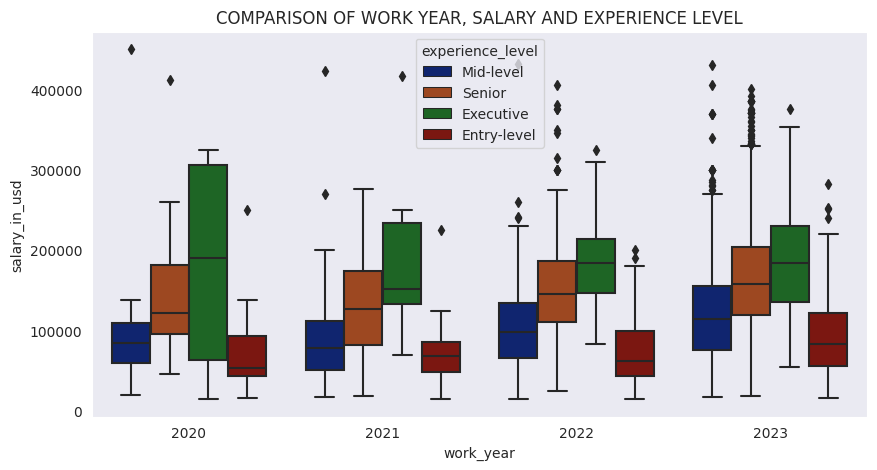

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data, y = 'salary_in_usd', x = 'work_year', hue = 'experience_level' )
plt.title("COMPARISON OF WORK YEAR, SALARY AND EXPERIENCE LEVEL")
plt.grid(axis = 'y', linestyle = ":", alpha = 0.)

# SALARY, EMPLOYMENT TYPE, WORK SETTING AND COMPANY SIZE

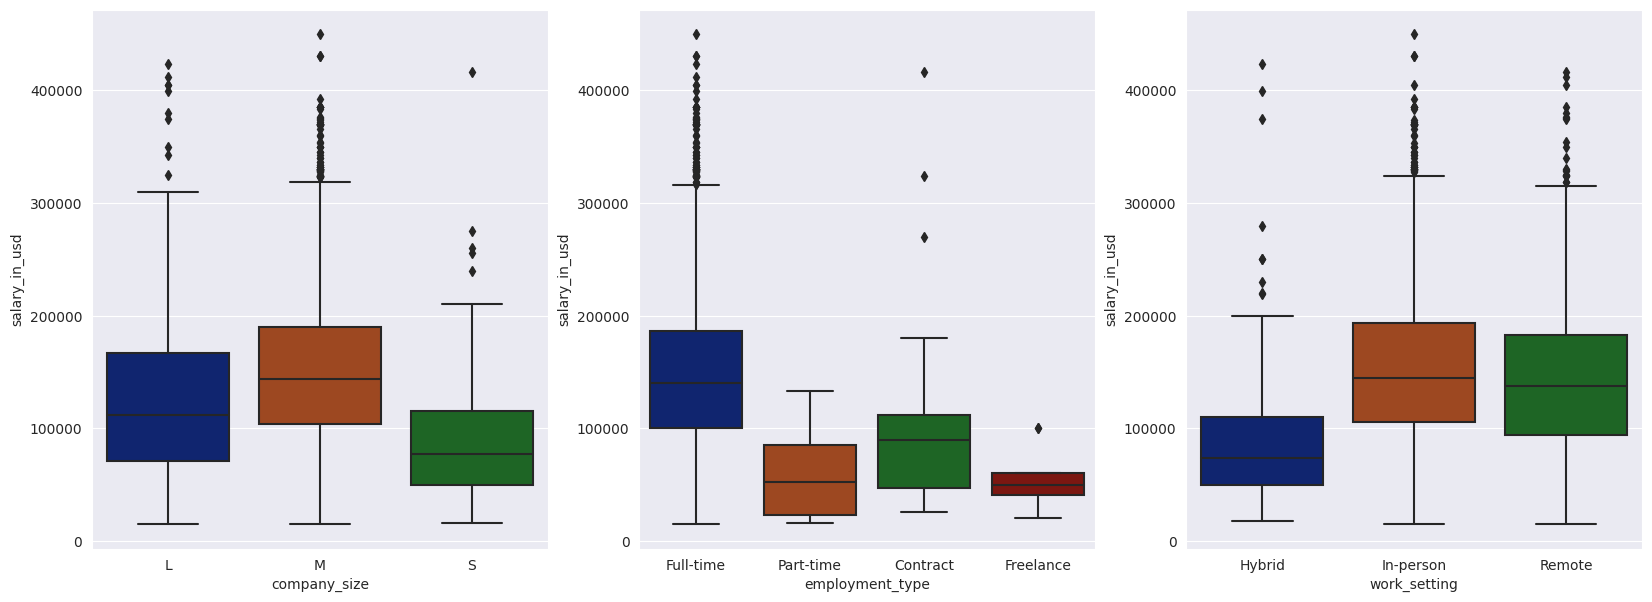

In [28]:
plt.figure(figsize=(20,7))
plt.subplot(131)
sns.boxplot(data, y='salary_in_usd', x='company_size')
plt.subplot(132)
sns.boxplot(data, y='salary_in_usd', x='employment_type')
plt.subplot(133)
sns.boxplot(data, y='salary_in_usd', x='work_setting')
plt.show()